Importing libraries only when necessary.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt

Reading data and droping useless features

In [241]:
g_stock = pd.read_csv("/home/mihir/internship/google_stock/GOOGL.csv")

g_stock.drop(['close','dividend_amount','split_coefficient'],1,inplace=True)
g_stock.head()
g_stock['close'] = g_stock.adjusted_close
g_stock.drop(['adjusted_close'],1,inplace=True)
g_stock.head()

ab = g_stock['close'] 
type(ab)

pandas.core.series.Series

In [ ]:
g_stock.size
g_stock.tail()
g_stock.describe()

Here g_stock has 20532 records from 2004-8-25 till 2018-3-25  
All columns are using nearly same range except volume hence doing column by column normalizing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
g_stock['open'] = min_max_scaler.fit_transform(g_stock.open.values.reshape(-1,1))
g_stock['high'] = min_max_scaler.fit_transform(g_stock.high.values.reshape(-1,1))
g_stock['low'] = min_max_scaler.fit_transform(g_stock.low.values.reshape(-1,1))
g_stock['volume'] = min_max_scaler.fit_transform(g_stock.volume.values.reshape(-1,1))
g_stock['close'] = min_max_scaler.fit_transform(g_stock.close.values.reshape(-1,1))

ab = min_max_scaler.inverse_transform(g_stock['close'].reshape(-1,1))
ab[2]

In [ ]:
MY OWN NORMALIZE FUNCTION

In [2]:
g_stock1 = pd.read_csv("/home/mihir/internship/google_stock/GOOGL.csv")

g_stock1.drop(['close','dividend_amount','split_coefficient'],1,inplace=True)

g_stock1['close'] = g_stock1.adjusted_close
g_stock1.drop(['adjusted_close'],1,inplace=True)

g_stock1.head()

,timestamp,open,high,low,volume,close
0,2018-03-22,1080.01,1083.92,1049.64,3418154,1053.15
1,2018-03-21,1092.57,1108.70,1087.21,1990515,1094.00
2,2018-03-20,1098.40,1105.55,1082.42,2709310,1095.80
3,2018-03-19,1117.76,1119.37,1088.92,3076349,1100.07
4,2018-03-16,1155.35,1156.81,1131.36,2654602,1134.42


In [6]:
a = g_stock1['close'].mean()
b= g_stock1['close'].std()
print(b)

def normalize(z):
    n_z = []
    mean=0
    std=0
    mean = z.mean()
    std = z.std()
    for i in z:
        i =(i-mean)/std
        n_z.append(i)
   
    return pd.DataFrame(n_z)

257.43178850773245


In [7]:


g_stock1['open'] = normalize(g_stock1.open)
g_stock1['close'] = normalize(g_stock1.close)
g_stock1['high'] = normalize(g_stock1.high)
g_stock1['low'] = normalize(g_stock1.low)
g_stock1['volume'] = normalize(g_stock1.volume)

g_stock1.head()




,timestamp,open,high,low,volume,close
0,2018-03-22,2.132824,2.118611,2.034983,-0.533492,2.503366
1,2018-03-21,2.188208,2.227498,2.201441,-0.706522,2.662049
2,2018-03-20,2.213916,2.213656,2.180218,-0.619404,2.669041
3,2018-03-19,2.299285,2.274383,2.209017,-0.574919,2.685628
4,2018-03-16,2.465041,2.438900,2.397051,-0.626034,2.819062


Sort data as per timestamp

In [8]:
g_stock1.dtypes
g_stock1['timestamp'] = pd.to_datetime(g_stock1.timestamp)
g_stock1 = g_stock1.sort_values('timestamp')
g_stock1.head(10)
g_stock1=g_stock1.reset_index(drop=True)
g_stock1.tail(13)

,timestamp,open,high,low,volume,close
3409,2018-03-06,2.230231,2.214008,2.233740,-0.806081,2.688852
3410,2018-03-07,2.189310,2.260454,2.213403,-0.761435,2.743779
3411,2018-03-08,2.296816,2.327420,2.334314,-0.764702,2.799484
3412,2018-03-09,2.395149,2.457311,2.410033,-0.696867,2.921691
3413,2018-03-12,2.507814,2.532715,2.520398,-0.689701,2.941463
3414,2018-03-13,2.537711,2.532012,2.411273,-0.689685,2.840388
3415,2018-03-14,2.422930,2.451862,2.445743,-0.701288,2.875271
3416,2018-03-15,2.439554,2.463902,2.416102,-0.750959,2.881952
3417,2018-03-16,2.465041,2.438900,2.397051,-0.626034,2.819062
3418,2018-03-19,2.299285,2.274383,2.209017,-0.574919,2.685628


Batches of 10 days to 1 op

In [10]:
w_len = 10
ip = []
op = []
tar=5
for i in range(len(g_stock1)-w_len+1):
    ip.append(g_stock1.iloc[i:i+w_len, 1:5].as_matrix())
    op.append(g_stock1.loc[i+w_len-1,'close'])
x = [[1,2,3],[4,5,60]]


x = np.array(ip)
y = np.array(op)


    

Train Test split

In [11]:
split = int(x.shape[0]*0.9)

x_train = x[:split]
x_test = x[split:]

y_train = y[:split]
y_test = y[split:]
x_test.shape[1]


10

reshaping into 3D tensors

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 4))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 4)) 

Designing and building model

In [13]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model

Using TensorFlow backend.


Designing Tensorflow net

In [14]:
model = Sequential()

model.add(LSTM(256, input_shape=(10,4), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(256, input_shape=(10,4), return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,batch_size=512,epochs=20,validation_split=0.1,verbose=1)

Train on 2763 samples, validate on 308 samples
Epoch 1/20
2763/2763 [==============================] - 6s 2ms/step - loss: 0.4180 - acc: 0.0000e+00 - val_loss: 1.5736 - val_acc: 0.0000e+00
Epoch 2/20
2763/2763 [==============================] - 5s 2ms/step - loss: 0.1673 - acc: 0.0000e+00 - val_loss: 1.2176 - val_acc: 0.0000e+00
Epoch 3/20
2763/2763 [==============================] - 4s 1ms/step - loss: 0.1161 - acc: 0.0000e+00 - val_loss: 1.2819 - val_acc: 0.0000e+00
Epoch 4/20
2763/2763 [==============================] - 4s 1ms/step - loss: 0.1159 - acc: 0.0000e+00 - val_loss: 1.1651 - val_acc: 0.0000e+00
Epoch 5/20
2763/2763 [==============================] - 4s 1ms/step - loss: 0.1002 - acc: 0.0000e+00 - val_loss: 1.1533 - val_acc: 0.0000e+00
Epoch 6/20
2763/2763 [==============================] - 4s 1ms/step - loss: 0.0899 - acc: 0.0000e+00 - val_loss: 1.1262 - val_acc: 0.0000e+00
Epoch 7/20
2763/2763 [==============================] - 4s 1ms/step - loss: 0.0825 - acc: 0.0000e+00 

predict for test data

In [16]:
p = model.predict(x_test)
p[0]

array([0.20867686], dtype=float32)

denormalizing

In [ ]:
ab = ab.reshape(-1,1)

a = min_max_scaler.fit_transform(ab)
new_p = min_max_scaler.inverse_transform(p)
new_y = min_max_scaler.inverse_transform(y_test)

p[0]



In [ ]:
y_test.shape[0]

In [17]:
da = []

def denormalize(p):
    num = 0
    da = []
    for i in p:
        i = (i*b)+a
        print(i)
        da.append(i)
        num= num+1
        print(num)
    print(len(da))
    return da
    

In [18]:
new_p = denormalize(p)
new_y = denormalize(y_test)

print(len(new_p))
print(len(new_y))



[462.424]
1
[482.0965]
2
[479.08313]
3
[476.4216]
4
[472.50235]
5
[465.9376]
6
[454.40536]
7
[443.48752]
8
[429.96756]
9
[430.33844]
10
[464.6914]
11
[481.9472]
12
[501.59167]
13
[515.2163]
14
[515.7531]
15
[514.5075]
16
[515.80853]
17
[515.3828]
18
[512.6301]
19
[507.22708]
20
[491.55957]
21
[498.89886]
22
[495.3598]
23
[500.2302]
24
[511.75583]
25
[510.12653]
26
[507.96414]
27
[506.42633]
28
[507.43332]
29
[504.8789]
30
[505.90613]
31
[504.80597]
32
[509.57132]
33
[511.98004]
34
[514.6941]
35
[526.75464]
36
[526.58527]
37
[527.27045]
38
[529.4691]
39
[529.0517]
40
[524.59296]
41
[520.9029]
42
[518.89435]
43
[514.3306]
44
[515.66376]
45
[519.66785]
46
[520.318]
47
[519.1278]
48
[524.03375]
49
[524.77435]
50
[523.7512]
51
[522.9733]
52
[521.4575]
53
[518.5507]
54
[515.5743]
55
[506.878]
56
[495.55035]
57
[484.56436]
58
[483.5904]
59
[474.7767]
60
[464.71698]
61
[474.24997]
62
[489.92703]
63
[507.84457]
64
[511.8589]
65
[519.0638]
66
[521.25854]
67
[522.8375]
68
[522.563]
69
[525.56195]

In [ ]:
df = pd.read_csv("/home/mihir/internship/google_stock/GOOGL.csv", index_col = 0)
df.drop(['close','dividend_amount','split_coefficient'],1,inplace=True)

df['close'] = df.adjusted_close

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

new_p = denormalize(df, p)
new_y = denormalize(df, y_test)

new_p[0]

In [ ]:
plotting

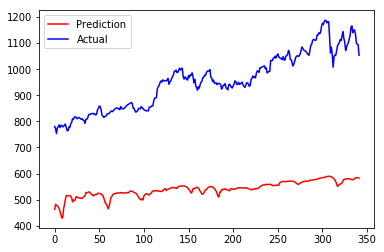

In [19]:
import matplotlib.pyplot as plt2

plt2.plot(new_p,color='red', label='Prediction')
plt2.plot(new_y,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

In [ ]:
print(p[230])